## Analyzing the Cleaned Dataset before Data Augmentation
- This is the analysis of the original dataset scraped from sperm banks
- This information will be used to generate Set B. Balanced Distrubtion to compare with Set A. Original Dataset

In [ ]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 22.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 9.9 MB/s eta 0:00:00


In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Loaded 1019 donor profiles

Standardized Ethnic Distribution:
                        Count  Percentage
standardized_ethnicity                   
Caucasian                 406       39.84
Asian                     222       21.79
East Indian               150       14.72
Hispanic/Latino            97        9.52
Mixed/Multi-Ethnic         71        6.97
Black                      51        5.00
Middle Eastern/Arabic      11        1.08
Unknown                    11        1.08

Standardized Education Distribution:

Education Levels:
                              Count  Percentage
standardized_education_level                   
Bachelor                        489       47.99
Master                          204       20.02
Other                           169       16.58
Unknown                          79        7.75
High School                      42        4.12
Doctoral                         36        3.53

Fields of Study:
                 Count  Percentage
education_field         

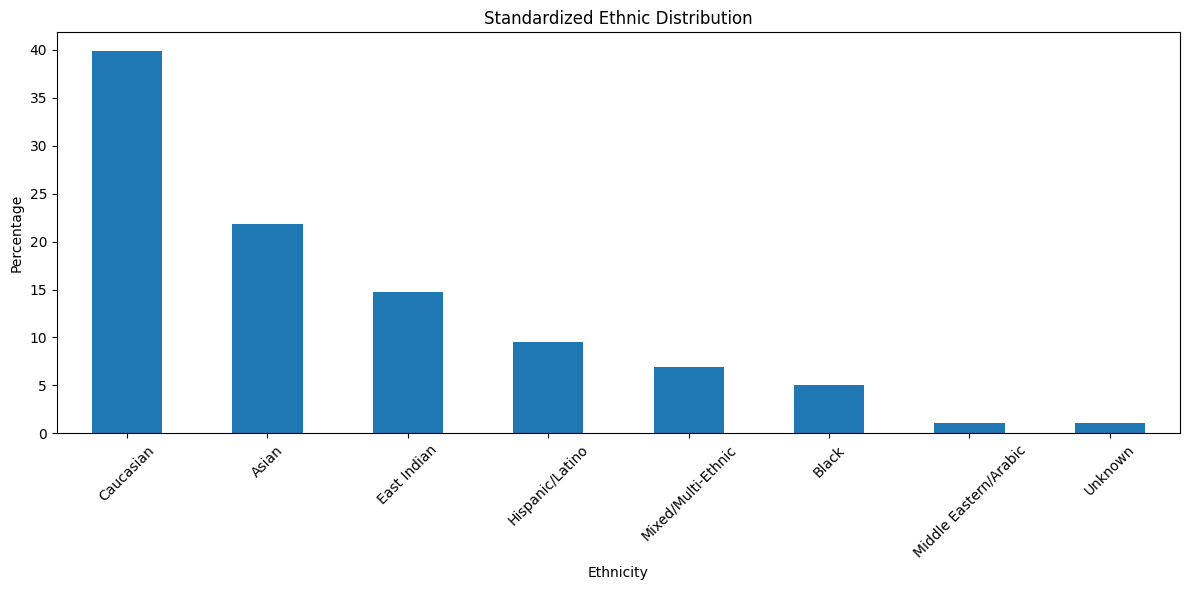

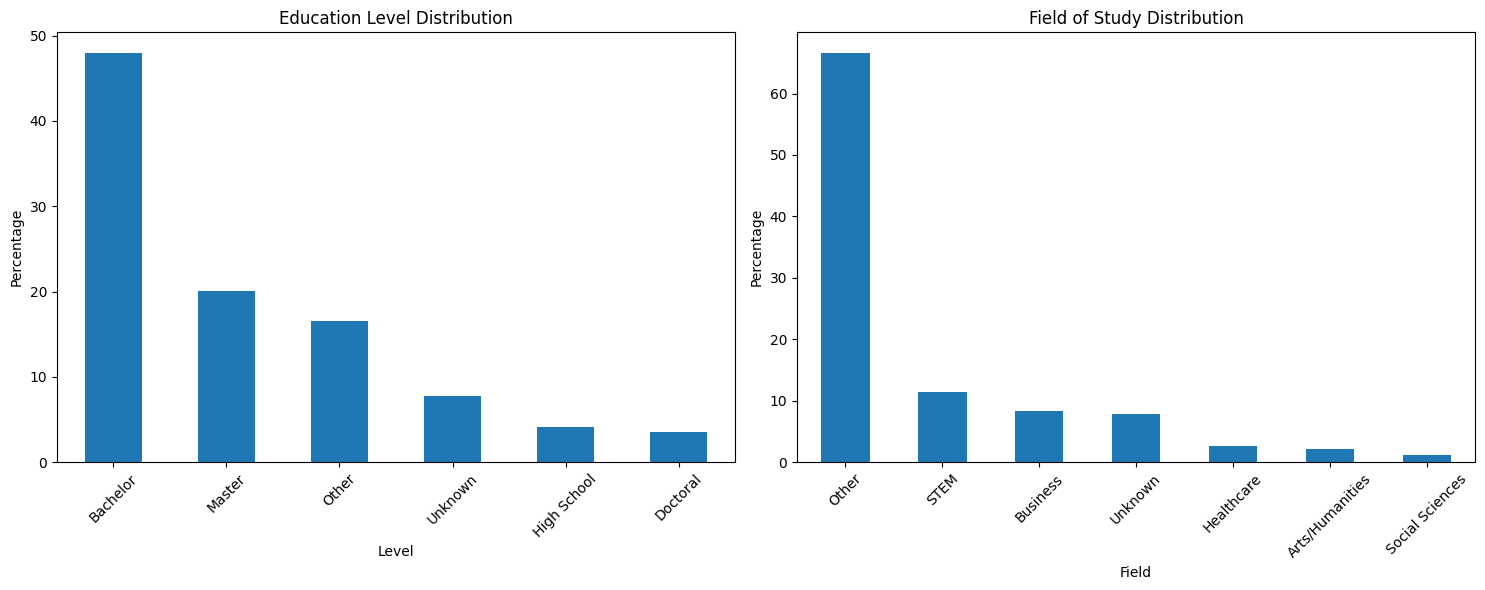

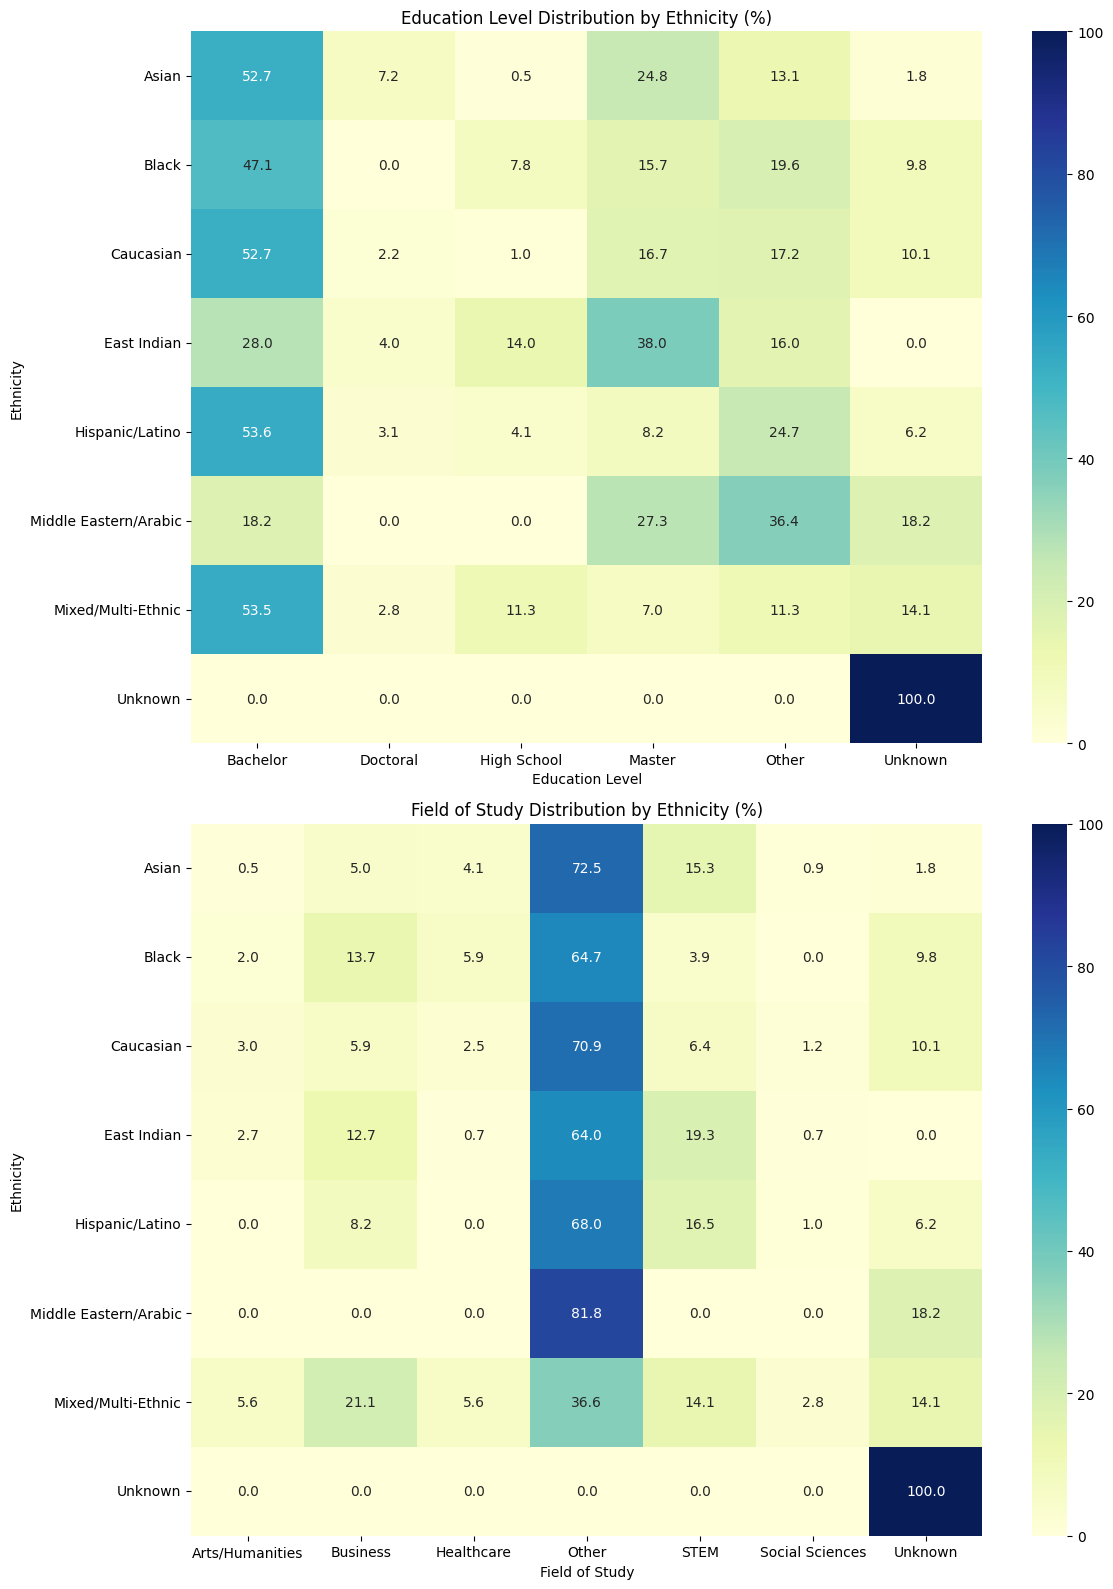

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

class DonorBiasAnalyzer:
    def __init__(self):
        self.input_path = "/Users/cindylinsf/Documents/CCI/THESIS/Msc_Thesis_Project_Files/data/processed/merged_donor_data.json"
        self.output_path = "/Users/cindylinsf/Documents/CCI/THESIS/Msc_Thesis_Project_Files/data/generated"
        self.df = None
        
        # Standardization mappings
        self.ethnic_mappings = {
            'Caucasian': ['Caucasian', 'Caucasian/White', 'White'],
            'Asian': ['Asian', 'East Asian', 'South Asian', 'Southeast Asian'],
            'Black': ['Black', 'African American', 'Black or African American', 'African American/Black'],
            'Hispanic/Latino': ['Hispanic', 'Latino', 'Hispanic or Latino', 'Latino/Hispanic'],
            'Middle Eastern/Arabic': ['Middle Eastern', 'Arabic', 'Middle Eastern or Arabic'],
            'Mixed/Multi-Ethnic': ['Multi', 'Mixed', 'Multi/Mixed', 'Mixed or Multi Ethnic'],
            'East Indian': ['East Indian', 'Indian'],
            'Other': ['Other', 'Pacific Islander', 'Native Hawaiian']
        }
        
        self.education_level_mappings = {
            'High School': ['High School', 'High School Diploma', 'GED', 'GCSE', 'A Levels'],
            'Bachelor': ['Bachelor', 'BS', 'BA', 'BBA', 'BSc', 'BEng'],
            'Master': ['Master', 'MS', 'MA', 'MBA', 'MEng', 'MSc'],
            'Doctoral': ['PhD', 'Doctorate', 'MD', 'JD', 'DDS', 'EdD'],
            'Other': ['Other', 'Certificate', 'Diploma', 'Associate']
        }
        
        self.field_mappings = {
            'STEM': ['Engineering', 'Computer', 'Science', 'Technology', 'Mathematics', 'Physics'],
            'Business': ['Business', 'Economics', 'Finance', 'Management', 'Marketing'],
            'Healthcare': ['Medicine', 'Nursing', 'Pharmacy', 'Health', 'Biology', 'Biomedical'],
            'Arts/Humanities': ['Art', 'Music', 'Literature', 'Philosophy', 'History', 'Language'],
            'Social Sciences': ['Psychology', 'Sociology', 'Anthropology', 'Political', 'Education']
        }

    def load_data(self):
        """Load and perform initial data cleaning"""
        with open(self.input_path, 'r') as file:
            data = json.load(file)
        self.df = pd.DataFrame(data)
        print(f"Loaded {len(self.df)} donor profiles")
        return self

    def standardize_ethnicity(self):
        """Standardize ethnic background categories"""
        def map_ethnicity(value):
            if pd.isna(value):
                return 'Unknown'
            value = str(value).lower()
            for standard, variants in self.ethnic_mappings.items():
                if any(variant.lower() in value for variant in variants):
                    return standard
            return 'Other'
        
        self.df['standardized_ethnicity'] = self.df['ethnic_background'].apply(map_ethnicity)
        return self

    def standardize_education(self):
        """Standardize education levels and fields"""
        def map_education_level(value):
            if pd.isna(value):
                return 'Unknown'
            value = str(value).lower()
            for standard, variants in self.education_level_mappings.items():
                if any(variant.lower() in value for variant in variants):
                    return standard
            return 'Other'
            
        def map_field(value):
            if pd.isna(value):
                return 'Unknown'
            value = str(value).lower()
            for standard, keywords in self.field_mappings.items():
                if any(keyword.lower() in value for keyword in keywords):
                    return standard
            return 'Other'
        
        self.df['standardized_education_level'] = self.df['education_level'].apply(map_education_level)
        self.df['education_field'] = self.df['education_level'].apply(map_field)
        return self

    def analyze_ethnic_distribution(self):
        """Analyze standardized ethnic distribution"""
        ethnic_dist = self.df['standardized_ethnicity'].value_counts()
        ethnic_pct = (ethnic_dist / len(self.df) * 100).round(2)
        
        results = pd.DataFrame({
            'Count': ethnic_dist,
            'Percentage': ethnic_pct
        })
        
        # Save results
        output_file = Path(self.output_path) / 'standardized_ethnic_distribution.csv'
        results.to_csv(output_file)
        
        # Create visualization
        plt.figure(figsize=(12, 6))
        results['Percentage'].plot(kind='bar')
        plt.title('Standardized Ethnic Distribution')
        plt.xlabel('Ethnicity')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(Path(self.output_path) / 'ethnic_distribution.png')
        
        print("\nStandardized Ethnic Distribution:")
        print(results)
        return results

    def analyze_education_distribution(self):
        """Analyze standardized education distribution"""
        edu_dist = self.df['standardized_education_level'].value_counts()
        edu_pct = (edu_dist / len(self.df) * 100).round(2)
        
        field_dist = self.df['education_field'].value_counts()
        field_pct = (field_dist / len(self.df) * 100).round(2)
        
        results = {
            'education_levels': pd.DataFrame({
                'Count': edu_dist,
                'Percentage': edu_pct
            }),
            'fields': pd.DataFrame({
                'Count': field_dist,
                'Percentage': field_pct
            })
        }
        
        # Save results
        for name, data in results.items():
            output_file = Path(self.output_path) / f'standardized_{name}_distribution.csv'
            data.to_csv(output_file)
        
        # Create visualizations
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        results['education_levels']['Percentage'].plot(kind='bar', ax=ax1)
        ax1.set_title('Education Level Distribution')
        ax1.set_xlabel('Level')
        ax1.set_ylabel('Percentage')
        ax1.tick_params(axis='x', rotation=45)
        
        results['fields']['Percentage'].plot(kind='bar', ax=ax2)
        ax2.set_title('Field of Study Distribution')
        ax2.set_xlabel('Field')
        ax2.set_ylabel('Percentage')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig(Path(self.output_path) / 'education_distribution.png')
        
        print("\nStandardized Education Distribution:")
        print("\nEducation Levels:")
        print(results['education_levels'])
        print("\nFields of Study:")
        print(results['fields'])
        return results

    def analyze_intersectional_bias(self):
        """Analyze intersection between ethnicity and education"""
        # Create cross-tabulation
        level_crosstab = pd.crosstab(
            self.df['standardized_ethnicity'],
            self.df['standardized_education_level'],
            normalize='index'
        ) * 100
        
        field_crosstab = pd.crosstab(
            self.df['standardized_ethnicity'],
            self.df['education_field'],
            normalize='index'
        ) * 100
        
        # Save results
        level_crosstab.to_csv(Path(self.output_path) / 'ethnicity_education_level_crosstab.csv')
        field_crosstab.to_csv(Path(self.output_path) / 'ethnicity_field_crosstab.csv')
        
        # Create heatmap visualizations
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
        
        sns.heatmap(level_crosstab, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax1)
        ax1.set_title('Education Level Distribution by Ethnicity (%)')
        ax1.set_xlabel('Education Level')
        ax1.set_ylabel('Ethnicity')
        
        sns.heatmap(field_crosstab, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax2)
        ax2.set_title('Field of Study Distribution by Ethnicity (%)')
        ax2.set_xlabel('Field of Study')
        ax2.set_ylabel('Ethnicity')
        
        plt.tight_layout()
        plt.savefig(Path(self.output_path) / 'intersectional_analysis.png')
        
        print("\nIntersectional Analysis:")
        print("\nEducation Level by Ethnicity (%):")
        print(level_crosstab)
        print("\nField of Study by Ethnicity (%):")
        print(field_crosstab)
        return {'level_distribution': level_crosstab, 'field_distribution': field_crosstab}

    def generate_summary_report(self):
        """Generate comprehensive summary report"""
        summary = {
            'total_profiles': len(self.df),
            'ethnic_distribution': self.df['standardized_ethnicity'].value_counts().to_dict(),
            'education_distribution': {
                'levels': self.df['standardized_education_level'].value_counts().to_dict(),
                'fields': self.df['education_field'].value_counts().to_dict()
            }
        }
        
        # Save summary report
        output_file = Path(self.output_path) / 'bias_analysis_summary.json'
        with open(output_file, 'w') as f:
            json.dump(summary, f, indent=4)
        
        print("\nBias Analysis Summary:")
        print(json.dumps(summary, indent=2))
        return summary

    def run_full_analysis(self):
        """Run complete bias analysis"""
        self.load_data()
        self.standardize_ethnicity()
        self.standardize_education()
        self.analyze_ethnic_distribution()
        self.analyze_education_distribution()
        self.analyze_intersectional_bias()
        self.generate_summary_report()

if __name__ == "__main__":
    analyzer = DonorBiasAnalyzer()
    analyzer.run_full_analysis()